## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

## Data Loading

In [3]:
os.listdir("input")

['Adolescent.csv', 'Adult.csv', 'Child.csv', 'Toddler.csv']

In [4]:
df=pd.read_csv(filepath_or_buffer="input/Toddler.csv")

In [5]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [6]:
print(df.shape)

(1054, 19)


## Data Preprocessing

In [7]:
print(df.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class'],
      dtype='object')


***dropping unwanted columns***

In [8]:
df=df.drop(labels=["Case_No","Ethnicity"],axis=1)

In [9]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,no,yes,family member,Yes


***renaming the columns***

In [10]:
df=df.rename(columns={"Qchat-10-Score":"Q_Score"})

In [11]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,no,yes,family member,Yes


***Visualizing Age_Mons Column***

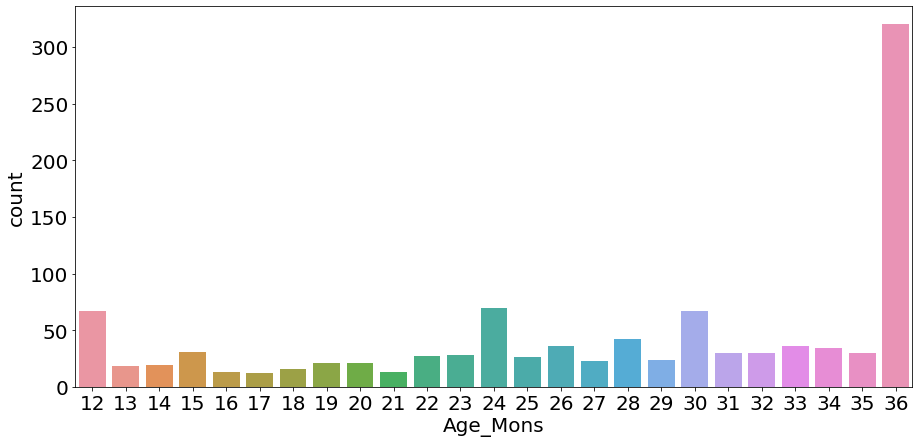

In [12]:
plt.figure(figsize=(15,7))
plt.rcParams["font.size"]=20
sns.countplot(x="Age_Mons",data=df)
plt.show()

***Visualizing Sex Column***

In [13]:
df["Sex"].value_counts()

m    735
f    319
Name: Sex, dtype: int64

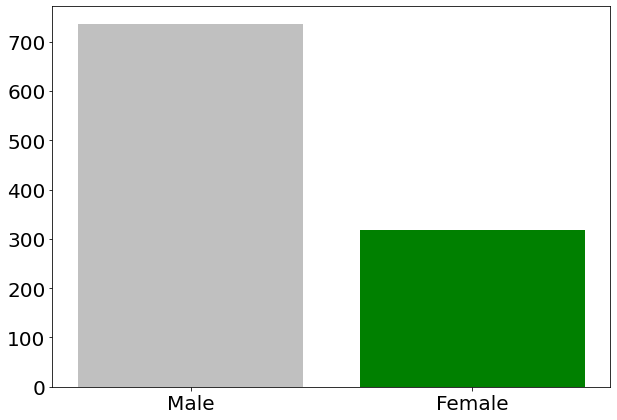

In [14]:
plt.figure(figsize=(10,7))
plt.rcParams["font.size"]=20
plt.bar(x=["Male","Female"],height=df["Sex"].value_counts(),color=["Silver","green"])
plt.show()

In [15]:
df["Sex"].replace(to_replace=["m","f"],value=[0,1],inplace=True)

In [16]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,no,yes,family member,Yes


***Visualizing Jaundice***

In [17]:
df["Jaundice"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df["Jaundice"].value_counts()

no     766
yes    288
Name: Jaundice, dtype: int64

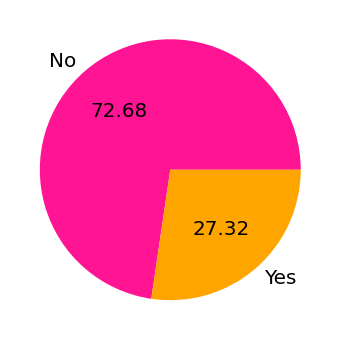

In [19]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.pie(x=df["Jaundice"].value_counts(),labels=["No","Yes"],colors=["deeppink","orange"],autopct="%.2f")
plt.show()

In [20]:
df["Jaundice"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [21]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,yes,family member,Yes


***Visualizing Family_mem_with_ASD column***

In [22]:
df["Family_mem_with_ASD"].unique()

array(['no', 'yes'], dtype=object)

In [23]:
df["Family_mem_with_ASD"].value_counts()

no     884
yes    170
Name: Family_mem_with_ASD, dtype: int64

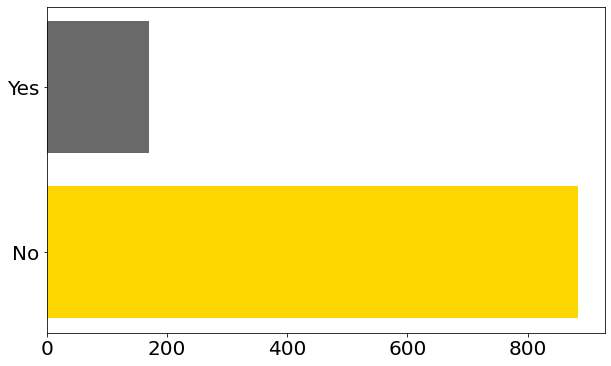

In [24]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.barh(y=["No","Yes"],width=df["Family_mem_with_ASD"].value_counts(),color=["gold","dimgray"])
plt.show()

In [25]:
df["Family_mem_with_ASD"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [26]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,family member,Yes


***visualizing Who completed the test column***

In [27]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [28]:
df["Who completed the test"].replace(to_replace="Health care professional",value="Health Care Professional",inplace=True)

In [29]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional', 'Self', 'Others'],
      dtype=object)

In [30]:
df["Who completed the test"].value_counts()

family member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [31]:
df["Who completed the test"].replace(to_replace=["family member","Health Care Professional","Self","Others"],value=[0,1,2,3],inplace=True)

In [32]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0,Yes


***Analyzing and Visualizing Class column***

In [33]:
df["Class"].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
df["Class"].value_counts()

Yes    728
No     326
Name: Class, dtype: int64

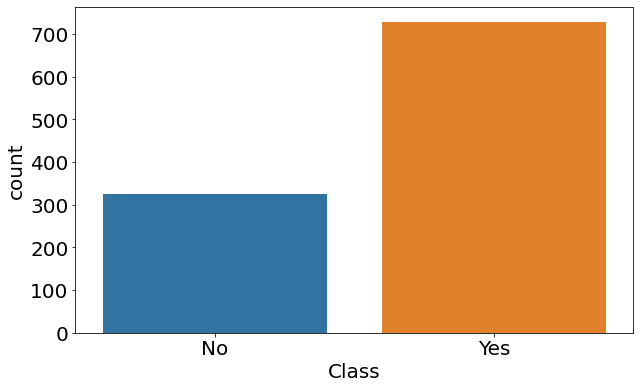

In [35]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
sns.countplot(x="Class",data=df)
plt.show()

In [36]:
df["Class"].replace(to_replace=["No","Yes"],value=[0,1],inplace=True)

In [37]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0,1


In [38]:
df.to_csv("Usefull_Data/usefull_toddler.csv",index=False)

In [39]:
df.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Q_Score                   0
Sex                       0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class                     0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   A1                      1054 non-null   int64
 1   A2                      1054 non-null   int64
 2   A3                      1054 non-null   int64
 3   A4                      1054 non-null   int64
 4   A5                      1054 non-null   int64
 5   A6                      1054 non-null   int64
 6   A7                      1054 non-null   int64
 7   A8                      1054 non-null   int64
 8   A9                      1054 non-null   int64
 9   A10                     1054 non-null   int64
 10  Age_Mons                1054 non-null   int64
 11  Q_Score                 1054 non-null   int64
 12  Sex                     1054 non-null   int64
 13  Jaundice                1054 non-null   int64
 14  Family_mem_with_ASD     1054 non-null   int64
 15  Who completed the tes

## Thank You